# Model SEIRD

Uno de los modelos más sencillos para la evolución de una epidemia es el modelo SIR, propuesto
en 1927 por W. O. Kermack & A. G. McKendrick que se utiliza para simular enfermedades en las
que una persona infectada, una vez recuperada (o muerta) no se puede volver a infectar.
Considere una población con un número constante de personas donde cada una puede estar
susceptible, infectada (casos activos) o retirada. Sean s, i, r las fracciones de la población que están
susceptibles, infectadas o retiradas, respectivamente (𝑠 + 𝑖 + 𝑟 = 1). Asumamos que, a cada
momento, la cantidad de susceptibles que se infecta por unidad de tiempo es proporcional a la
cantidad e susceptibles multiplicada por la cantidad de infectados, 𝛽𝑠𝑖, donde 𝛽 es una constante
que nos dice qué tan contagiosa es la enfermedad. Por el contrario, la cantidad de infectados que
dejan de serlo por unidad de tiempo es solamente proporcional al número de infectados, 𝛾𝑖,
donde 1/𝛾 da el tiempo característico de recuperación. Las ecuaciones diferenciales acopladas
que rigen el comportamiento son, por lo tanto:
\[
\begin{align*}
\frac{dS}{dt} & = -\beta S I \\
\frac{dI}{dt} & = \beta S I - \beta I \\
\frac{dR}{dt} & = \beta I \\
\end{align*}
\]

donde $ \beta $ es la tasa de contagio y $\beta$ es la tasa de recuperación. A partir de estas ecuaciones, podemos escribir un programa que utilice el método de Runge-Kutta de 4º orden para simular la evolución temporal de cada grupo en la población.

a) Vamos a implementar este modelo en Python, asumiendo los valores iniciales $S(0) = 0.999$, $I(0) = 0.001$, y $R(0) = 0$ (ya que $S + I + R = 1$), junto con las tasas $\beta = 0.35$ y $\beta = 0.08$.


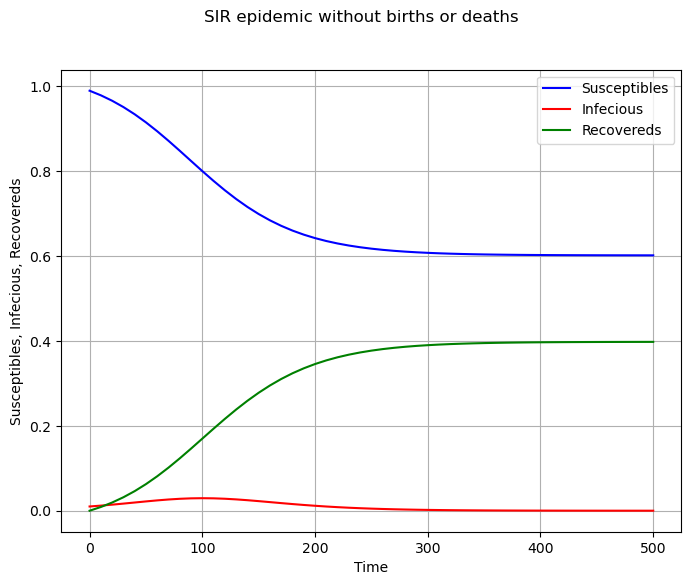

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

#Sistema de Ecuaciones Diferenciales
def SIR(t, statevector, params):
    beta, beta = params
    
    s, i, r = statevector
    
    ds = - beta * s * i
    di = beta * s * i - gamma * i
    dr = gamma * i
    
    return np.array([ds, di, dr])

#Definción Runge-Kutta Paso Fijo
def RK4(func, initial_state, t0, tf, h, params):
    # tci = time.time()    

    times = np.arange(t0,tf + h, h)
    num_steps = len(times)
    
    #Inicialización de la matriz de estados, con el número de pasos 
    # y el número de ecuaciones
    states = np.zeros((num_steps, len(initial_state))) 
    states[0] = initial_state
    
    #Algoritmo de Runge-Kutta
    for i in range(1, num_steps):
        k1 = h * func(times[i - 1], states[i - 1], params)
        k2 = h * func(times[i - 1] + 0.5 * h, states[i - 1] + 0.5 * k1, params)
        k3 = h * func(times[i - 1] + 0.5 * h, states[i - 1] + 0.5 * k2, params)
        k4 = h * func(times[i - 1] + h, states[i - 1] + k3, params)
        
        states[i] = states[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    
    sol = np.transpose(np.concatenate((times.reshape(-1,1), states),1))
    
    # tcf = time.time()
    # print(f"Tiempo de computo del algoritmo RK: {(tcf- tci)/60:.2} min")
    return sol

#Dedfinición de la gráfica
def grafica(sol):

    t = sol[0]   
    s = sol[1]
    i = sol[2]
    r = sol[3]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(t, s, "b-",label=r"Susceptibles")
    ax.plot(t, i, "r-",label=r"Infecious")
    ax.plot(t, r, "g-",label=r"Recovereds")


    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Susceptibles, Infecious, Recovereds")
    ax.grid(True)
    ax.legend()


    fig.suptitle("SIR epidemic without births or deaths")
    
    
if __name__ == "__main__":
    
    #Parámetros
    beta = 0.1
    gamma = 0.08
    params = np.array([gamma, beta])
    
    #Condiciones Iniciales
    S0=0.99
    I0=0.01
    R0=0
    ci = np.array([S0, I0, R0])
    
    #Intervalo de tiempo
    t0 = 0
    tf = 500
    h = 1e1
    
    #Solución  
    sol = RK4(SIR, ci, t0, tf, h, params)


    #Gráfica
    grafica(sol)
    

    
  


b) El archivo CoronavirusColombiayBogota.xmls contiene los datos de los casos reportados de
Covid-19 para Colombia y para Bogotá.


• Escoja un grupo de datos (Colombia o Bogotá) y utilice los datos del inicio de la pandemia
para deducir una rata de crecimiento diario 𝑎 = 𝑖(𝑡 + 1)/𝑖(𝑡) e identifique un día en el que
este valor ya esté estable. Identifique ese día como el momento inicial de la pandemia 𝑡 = 0.
Calcule los valores de iniciales como 𝑟 = 0, 𝑠 = 1 − 𝑖 e 𝑖 = 𝐼/𝑁, utilizando el número de
casos activos I en ese momento y una población de N=45,000,000 para Colombia o
N=8,000,000 para Bogotá.


In [3]:
#@title Carga y limpieza de datos
import numpy as np
import pandas as pd

#Cargar los datos
data = pd.read_excel('Coronavirus Colombia y Bogota.xlsx', sheet_name='Bogotá')

#Limpiar los datos
data_clean = data.dropna(subset=["dias", "Casos Activos"])

#Convertir los datos a arreglos de numpy
dias, infectados = data_clean["dias"].to_numpy(), data_clean["Casos Activos"].to_numpy()



c:\Users\cterr\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


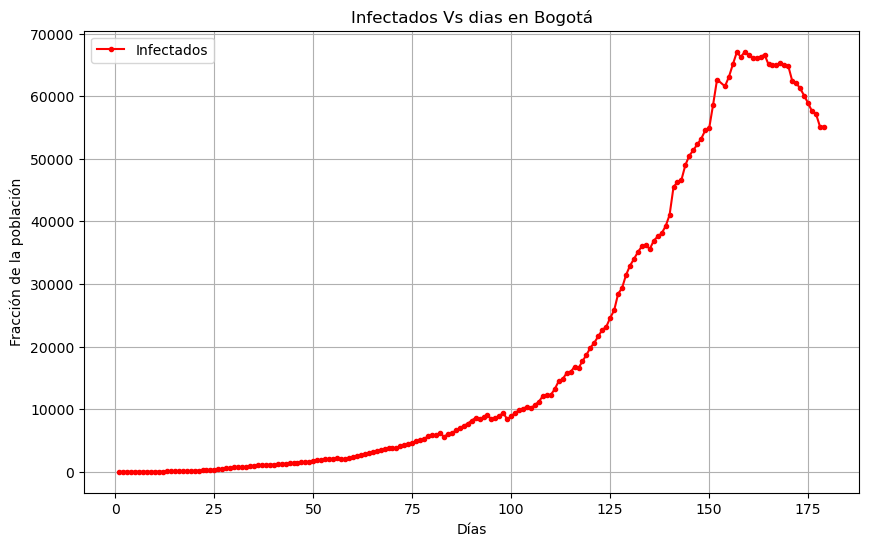

In [4]:
#@title Grafica de los datos

dia_pico_observado = infectados.argmax()

plt.figure(figsize=(10, 6))
plt.plot(dias, infectados, "r.-",label=r"Infectados")
plt.title('Infectados Vs dias en Bogotá')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.grid(True)
plt.show()

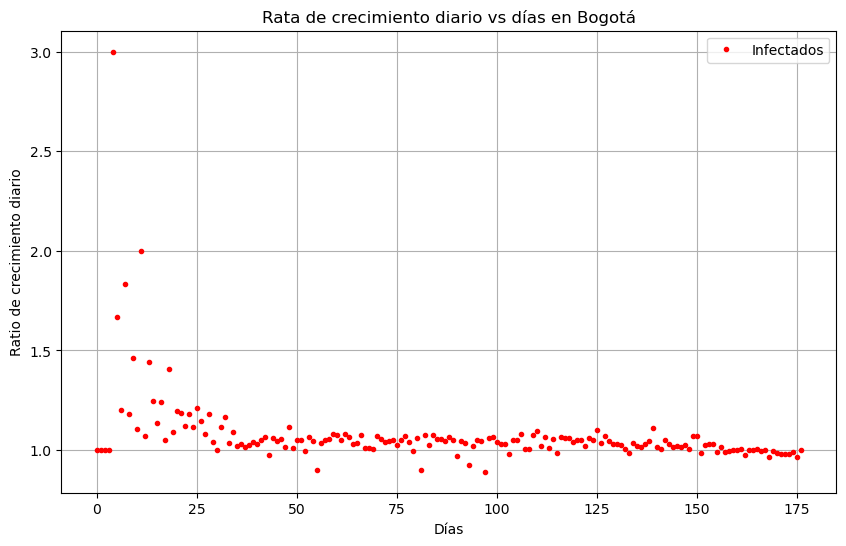

(68, 0.8910912190963342)

In [13]:
#@title Crecimiento diario de infectados

#Rata de crecimiento diario
a = np.zeros(len(infectados)-1)
for t in range(len(infectados)-1):  # len(infectados)-1 asegura que t+1 no exceda la longitud del array
    a[t] = np.divide(infectados[t+1], infectados[t])


# Día de menor crecimiento

#Criterios
##Definir un rango de valores para el día estable
## con dos desviacones estandar


#t_estable = np.mean(a[100:]) 
t_estable = np.argmin(a[100:])  
t_menor = np.argmin(a)  


plt.figure(figsize=(10, 6))
plt.plot(a, "r.",label=r"Infectados")
plt.title('Rata de crecimiento diario vs días en Bogotá')
plt.xlabel('Días')
plt.ylabel('Ratio de crecimiento diario')
plt.legend()
plt.grid(True)
plt.show()

t_estable, a[t_menor]

Las condiciones iniciales son: R0 = 0.0 .I0 = 0.001173 ,S0 = 0.998827


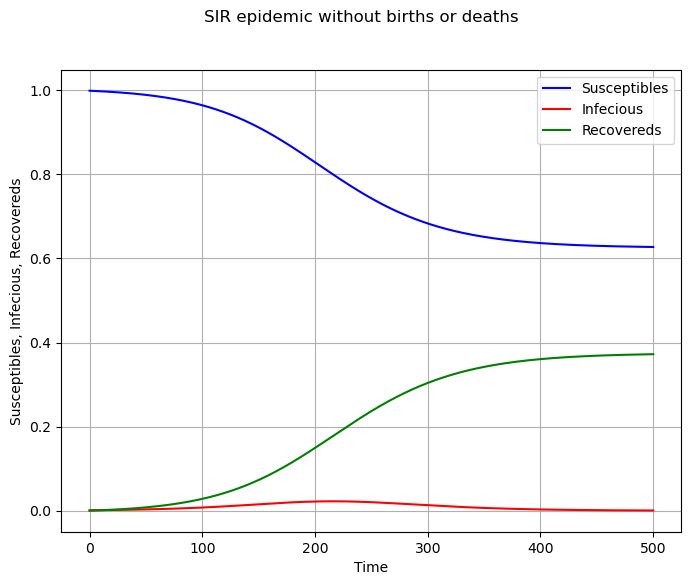

In [14]:

# Parámetros
beta = 0.1
gamma = 0.08

params = np.array([gamma, beta])

#Condiciones Iniciales
# Población de Bogota
N = 8e6

# Número de casos activos en el momento inicial (hipotético)
I_inicial = infectados[t_menor]


# Calcular S0, I0, y R0 basado en los datos hipotéticos
I0 = I_inicial / N
S0 = 1 - I0
R0 = 0.0  # Asumimos que inicialmente no hay recuperados

ci = np.array([S0, I0, R0])

print("Las condiciones iniciales son: R0 =",R0,".I0 =",I0,",S0 =",S0)


#Intervalo de tiempo
t0 = 0
tf = 500
h = 1e-1

#Solución
sol = RK4(SIR, ci, t0, tf, h, params)

#Gráfica
grafica(sol)

• Luego, considere el siguiente procedimiento, que se puede considerar como si fuera una
función 𝑓(𝛾): Dado un valor de 𝛾, calcule 𝛽 a partir de 𝑎. Con estos valores de 𝛽 y 𝛾, corra la
simulación del modelo SIR. Como resultado de la simulación, calcule el número de días
$𝑡_simulado$, en el que se presenta el pico en la simulación, y defina la función $𝑓(𝛾) = 𝑡_{simulado} − 𝑡_{datos}$, donde $t_{datos}$ es el día en el que ocurre el pico, contado desde el momento inicial.


Para resolver el problema anterior veamos como se comporta la ecuación que gobierna a los infectados
$$
\frac{d i}{d t}=\beta s i-\gamma i
$$
En el momento inicial de la pandemia tenemos que , $s(t) \sim s(0)=$ cte. Luego,
$$
\frac{d i}{d t}=(\beta s(0)-\gamma) i
$$
, cuya solución es una exponencial creciente si $\frac{\beta s(0)}{\gamma}>1$. Asi pues
$$
\begin{aligned}  

i(t)=i(0) e^{(\beta-\gamma) t} \\
a=\frac{i(t+1)}{i(t)}=&\frac{i(0) e^{(\beta-\gamma)(t+1)}}{i(0) e^{(\beta-\gamma) t}}=e^{(\beta-\gamma)} \\
\quad \beta-\gamma&=\ln (a)\\
\beta =& \gamma + \ln (a)
\end{aligned}
$$

Dia pico simulado:  0.0


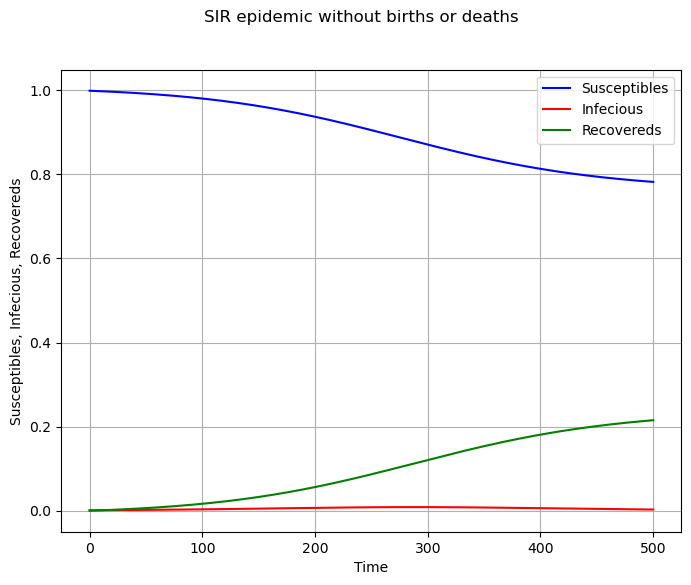

In [16]:
# Parámetros
gamma = 0.08
beta = gamma + np.log(a[t_estable])

params = np.array([gamma, beta])

#Intervalo de tiempo
t0 = 0
tf = 500
h = 1e-1

#Solución
sol = RK4(SIR, ci, t0, tf, h, params)

#Gráfica
grafica(sol)

#Maximo de infectados
infectados_simulados = sol[1]
dia_pico_simulado = np.argmax(infectados_simulados)*h
print("Dia pico simulado: ", dia_pico_simulado)

    

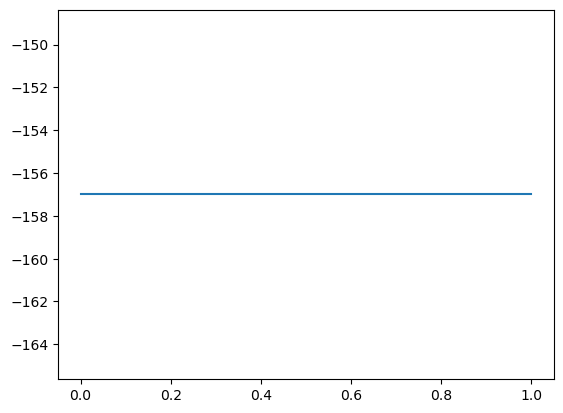

: 

In [17]:
beta = gamma + np.log(a[t_menor])
beta = 0.1
# Función para simular el modelo SIR y encontrar el día del pico de infectados
def dia_pico(beta):
    infectados = RK4(SIR, ci, t0, tf, h, (beta, gamma))[2]
    dia_pico = np.argmax(infectados)  # Encuentra el día con más infectados
    return dia_pico

def f_gamma(beta):
    return dia_pico(beta) - dia_pico_observado

f_gamma = np.vectorize(f_gamma)

beta = np.linspace(0,1,100)
plt.plot(beta, f_gamma(beta))

• Finalmente, utilice el método de la bisección de esta “función” para identificar el valor de
𝛾 que predice correctamente el momento de aparición del pico (𝑓(𝛾) = 0).

In [9]:
# Método de bisección
def biseccion(f, a, b, tol=1e-5, max_iter=1000):

    if f(a) * f(b) >= 0:
        print("El método de bisección falla.")
        return None

    iteracion = 0
    while (b - a) / 2 > tol and iteracion < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iteracion += 1

    return (a + b) / 2


beta = np.linspace(0,1,100)

beta_min = 0.0
beta_max = 1.0

beta_optimo = biseccion(f_gamma, beta_min, beta_max, tol=1e-4,max_iter=1000)

print(f"El valor de beta que minimiza la diferencia entre el día del pico simulado y el observado es {beta_optimo:.3f}")
plt.plot(beta, f_gamma(beta))

El método de bisección falla.


TypeError: unsupported format string passed to NoneType.__format__